In [1]:
import json

import matplotlib.pyplot as plt

from muutils.zanj import ZANJ
from maze_transformer.generation.generators import LatticeMazeGenerators
from maze_transformer.training.maze_dataset import MazeDataset, MazeDatasetConfig
from maze_transformer.training.maze_dataset_configs import MAZE_DATASET_CONFIGS

print(MAZE_DATASET_CONFIGS.keys())

dict_keys(['test-g3-n5-a_dfs-h91386'])


In [2]:
zanj: ZANJ = ZANJ(external_list_threshold=8)

def plot_dataset_mazes(ds: MazeDataset, count: int|None = None):
	count = count or len(ds.mazes)
	fig, axes = plt.subplots(1, count, figsize=(15, 5))
	for i in range(count):
		axes[i].imshow(ds.mazes[i].as_pixels())
		# remove ticks
		axes[i].set_xticks([])
		axes[i].set_yticks([])

In [3]:
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="test",
	grid_n=10,
	n_mazes=8,
	maze_ctor=LatticeMazeGenerators.gen_dfs,
)

In [4]:
dataset: MazeDataset = MazeDataset.from_config(
	cfg,
	do_download=False,
	load_local=False,
	do_generate=True,
	local_base_path="../data/",
	verbose=True,
	zanj=zanj,
	gen_parallel=True,
	pool_kwargs=dict(processes=2),
)

generating & solving mazes: 100%|██████████| 8/8 [00:04<00:00,  1.95maze/s]


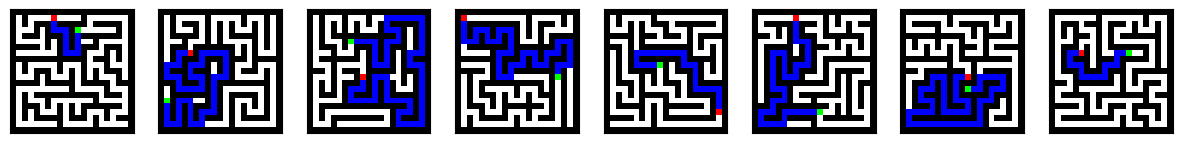

In [5]:
plot_dataset_mazes(dataset)

In [6]:
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="test",
	grid_n=10,
	n_mazes=8,
	maze_ctor=LatticeMazeGenerators.gen_dfs,
	maze_ctor_kwargs=dict(n_accessible_cells=50, max_tree_depth=9),
)

In [11]:
dataset: MazeDataset = MazeDataset.from_config(
	cfg,
	do_download=False,
	load_local=False,
	do_generate=True,
	local_base_path="../data/",
	verbose=True,
	zanj=zanj,
	gen_parallel=True,
	pool_kwargs=dict(processes=2),
)

generating & solving mazes: 100%|██████████| 8/8 [00:03<00:00,  2.12maze/s]


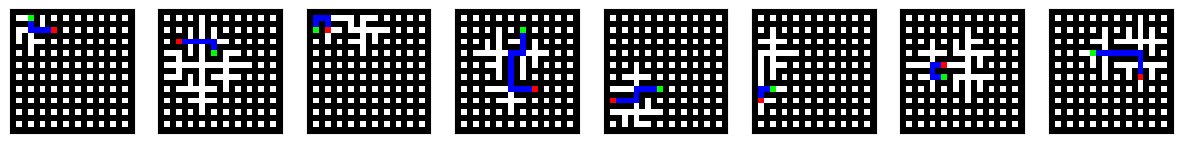

In [12]:
plot_dataset_mazes(dataset)